In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spstats
import random
%matplotlib inline
import os
os.chdir('C:/data/plot')

In [9]:
EcoBuilder = []
for line in open('EcoBuilder_linkage_density.txt', 'r'):  
    rs = line.replace('\n', '')  
    EcoBuilder.append(rs)
    
EcoBuilder = [ float(x) for x in EcoBuilder ]

In [10]:
realworld = []
for line in open('realworld_linkage_density.txt', 'r'):  
    rs = line.replace('\n', '')  
    realworld.append(rs)
    
realworld = [ float(x) for x in realworld ]

In [11]:
#np.concatenate数组拼接
#np.empty()根据给定的维度和数值类型返回一个新的数组
#np.random.permutation()生成随机序列
def bs_permute(dist1, dist2, func, size):
    distboth = np.concatenate((dist1,dist2))
    
    bs_samples = np.empty(size)
    for i in range(size):
        scrambled = np.random.permutation(distboth)
        perm1 = scrambled[:len(dist1)]
        perm2 = scrambled[len(dist1):]
        bs_samples[i] = func(perm1, perm2)
        
    return bs_samples

#np.median()计算沿指定轴的中位数
def diff_meds(dist1, dist2):
    return np.median(dist1) - np.median(dist2)
    
def test_median(dist1, dist2, size):
    gtruth_dmed = diff_meds(dist1, dist2)
    sample_dmeds = bs_permute(dist1, dist2, diff_meds, size)
    
    pval = np.sum(sample_dmeds >= gtruth_dmed) / len(sample_dmeds)
    return pval

In [12]:
linkagedensity_pval = test_median(realworld, EcoBuilder, 100000)

print(f'p={linkagedensity_pval}')

p=0.0


C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


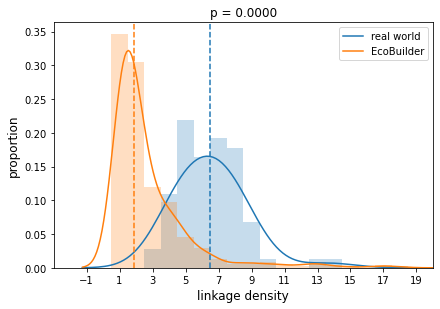

In [14]:
#plot histograms

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
#fig.tight_layout()用于调整布局
fig.tight_layout()

# hists
pbins = np.arange(-3,20)-.5

sns.distplot(realworld, hist_kws=dict(alpha=.25), ax=axes, bins=pbins)
sns.distplot(EcoBuilder, hist_kws=dict(alpha=.25), ax=axes, bins=pbins)


axes.legend(['real world','EcoBuilder'])


axes.set_ylabel('proportion',size=12)
axes.set_xlabel('linkage density',size=12)

# medians
#plt.get_cmap()在Matplotlib中选择颜色图
#axvline()在绘图轴上添加垂直线
cmap = plt.get_cmap('tab10')
mmed0 = np.median(EcoBuilder)
mmed1 = np.median(realworld)
axes.axvline(mmed0, color=cmap(.1), linestyle='--')
axes.axvline(mmed1, color=cmap(0), linestyle='--')

# ticks
# axes[0].tick_params(axis='y', which='both', left=False, labelleft=False)
# axes[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axes.set_xlim([-3,20])
axes.set_xticks([-1,1,3,5,7,9,11,13,15,17,19])
axes.set_title(f'p = {linkagedensity_pval:.4f}')

plt.savefig('C:/data/plot/figures/linkagedensity.pdf', bbox_inches='tight', pad_inches=0)